In [1]:
#instalamos las librerías necesarias
import os #chdir() permite cambiar el directorio actual   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, label_binarize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier,  GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, plot_confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold, cross_val_predict, cross_val_score, GridSearchCV, KFold, LeaveOneOut, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow import get_logger
from tensorflow.keras import layers

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
#algunas funciones importantes 
#dibujar la matriz de confusion
def plot_confusion_matrix(X, y, gsearch, p, seed):
  print('\n================================================')
  print('MATRIZ DE CONFUSION:')
  print('================================================')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state=seed)

  y_hat_train = gsearch.predict(X_train)
  y_hat_test = gsearch.predict(X_test)

  print('Confusion matrix train:\n', 'Train score: ', round(gsearch.score(X_train, y_train),3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_train, y=y_train)
  plt.show()

  print('\nConfusion matrix test:\n','Test score: ', round(gsearch.score(X_test, y_test), 3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_test, y=y_test)  
  plt.show()
    

# En la documentación hablar sobre librerías imprescindibles
NumPy: imprescindible para computación científica, ofrece estructuras de datos como arreglos multidimensionales (arrays) y funciones para operaciones matemáticas eficientes.

Pandas: para el manejo y análisis de datos. Proporciona estructuras de datos como DataFrames y Series, facilitando la manipulación y limpieza de datos tabulares.

Matplotlib:  para crear visualizaciones gráficas. Ofrece amplias opciones para crear gráficos, histogramas, gráficos de dispersión, entre otros.

Seaborn: basada en Matplotlib, es una biblioteca para visualización de datos estadísticos. Ofrece gráficos más atractivos y una integración más sencilla con DataFrames de Pandas.

TensorFlow: biblioteca de deep learning desarrollada por Google. Es una de las bibliotecas más populares para construir y entrenar redes neuronales en tareas de inteligencia artificial.

scikit-learn: biblioteca de machine learning con una amplia gama de algoritmos y herramientas para clasificación, regresión, agrupamiento, selección de modelos y más.

Keras: biblioteca de deep learning que proporciona una interfaz de alto nivel para construir y entrenar redes neuronales de manera rápida y sencilla. Es una API de alto nivel que se ejecuta sobre frameworks de bajo nivel como TensorFlow, Theano o CNTK. Keras facilita la creación de redes neuronales al abstraer muchos de los detalles complicados y proporcionar una sintaxis intuitiva.

SciKeras: Es una capa de abstracción que permite utilizar modelos de Keras dentro de scikit-learn, lo que facilita la integración de técnicas de aprendizaje profundo en flujos de trabajo de aprendizaje automático.

# Lectura de datos y exploración inicial

In [2]:
#customizaciones
sns.set_style( 'darkgrid' )
np.set_printoptions( precision = 2 )
get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore", message="Setting the random state for TF")
seed = 2023

(462, 10)
['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
Absent     270
Present    192
Name: famhist, dtype: int64


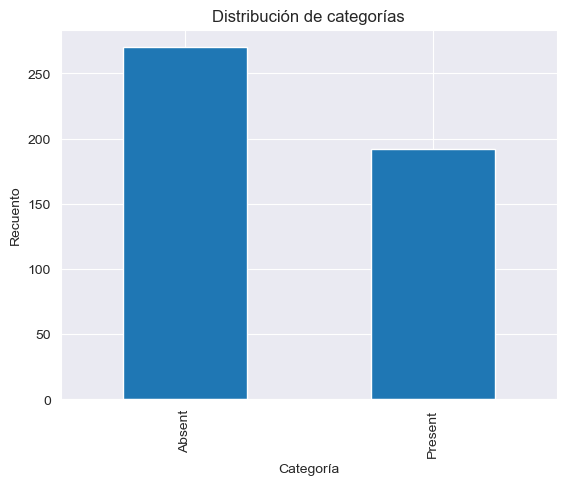

In [3]:

#----- Lectura archivo y primer analisis
data_original = pd.read_csv('./SAheart.csv') 
data = data_original
print(data.shape)

# Obtener los nombres de las columnas del DataFrame
column_names = data.columns.tolist()
print(column_names)

data.head() #para mostrar las 5 primeras lineas
data.describe() #estadisticos basicos de las variables continuas
#exploración datos categóricos
#Mostrar recuento de categorías únicas en una columna categórica
print(data['famhist'].value_counts())


# Gráfico de barras para visualizar la distribución de categorías
data['famhist'].value_counts().plot(kind='bar')
plt.title('Distribución de categorías')
plt.xlabel('Categoría')
plt.ylabel('Recuento')
plt.show()

In [17]:
# Tabla cruzada entre dos variables categóricas
tabla_cruzada = pd.crosstab(data['famhist'], data['chd'])
print(tabla_cruzada)

# Realizar una prueba de Chi-cuadrado entre dos variables categóricas
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)
print("Valor de Chi-cuadrado:", chi2)

# mayor sea el valor de Chi-cuadrado, mayor será la discrepancia y más probable será que las variables estén asociadas
#p es mayor que el nivel de significancia, no se puede rechazar la hipótesis nula, 
#y no hay suficiente evidencia para afirmar que hay una asociación significativa entre las variables.
print("Valor de p:", p)

chd       No  Si
famhist         
Absent   206  64
Present   96  96
Valor de Chi-cuadrado: 33.1226039295323
Valor de p: 8.652695462627767e-09


In [7]:
#busca nulos
data.isna().sum()

#busca duplicados
print(data.duplicated().sum()) #para ver si hay alguna obs duplicada
print(data.shape) #tamaño (filasxcolumnas) del archivo
data = data.drop_duplicates() #eliminar duplicados (si procede)
print(data.duplicated().sum())
print(data.shape)

0
(462, 10)
0
(462, 10)


In [21]:
# determina variable objetivo
target = "chd"
#hacer una lista con las variables input numericas
continuas = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
#hacer una lista con las variables input categoricias
categoricas = ['famhist']

In [19]:
#normaliza variables numericas usando minimo y maximo
scaler = MinMaxScaler()
X = data[continuas]
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale.columns = X.columns
data[continuas] = X_scale   #data tiene las variables continuas normalizadas

In [10]:
#normaliza variables numericas usando media y desv.tipica
#para no mezclar las transformaciones y puesto que en este caso usaré el resultado de minMax, lo llamo de otra forma
scaler2 = StandardScaler()
X_otro = data_original[continuas]
X_scale_Norm = pd.DataFrame(scaler2.fit_transform(X_otro))
X_scale_Norm.columns = X_otro.columns
#hago otra copia del data original
data2 = data_original
data2[continuas] = X_scale_Norm  #data2 tiene las variables continuas estandarizadas

In [11]:
#pasa variables categoricas a dummy
#ColumnTransformer permite hacer transformaciones de diverso tipo a distintos tipos de atributos
#concretamente, el transformador OneHotEncoder es para transformar a dummies
#a cada transformación se le pone un "nombre" o "etiqueta", en este caso sólo hacemos la transformación OneHotEncoder,
#a la que se le asigna el nombre ohe
#remainder indica cómo manejar las columnas no incluidas en las transformaciones: 'passthrough' significa que las columnas que no se han transformado mediante OneHotEncoder se mantendrán sin cambios
#drop='first' se utiliza para eliminar la primera columna dummy para evitar la multicolinealidad entre dummies. Se elimina una columna para cada característica categórica, por lo que si tienes n categorías en una característica, se crearán n-1 variables dummy para representar esas categorías. 
#La columna eliminada se considera la referencia.
#aquí se define una forma ed transformar, pero no se aplica
cat_trans_cols = ColumnTransformer(transformers=[ ('ohe', OneHotEncoder(drop='first'), categoricas)],
                                    remainder='passthrough')

# Transformaciones eficaces a atributos
ColumnTransformer se utiliza para aplicar transformaciones específicas a columnas particulares en el conjunto de datos, y puedes agregar el paso de creación de variables dummy para las columnas categóricas utilizando la función make_column_transformer. A la vez, se puede aplicar la normalización de las variables continuas

In [20]:
# Definir el ColumnTransformer
preprocessor = make_column_transformer(
    (MinMaxScaler(), continuas), # Escalar características numéricas
    (OneHotEncoder(), categoricas)         # Crear variables dummy para la columna categórica 'gender'
)
#si no se quieren incluir todas las dummies, (drop='first')
#si se crean todas, luego se puede decidir qué categoría se usa
# Aplicar el ColumnTransformer para obtener las variables dummy y las características restantes
transformed_data = preprocessor.fit_transform(data_original)

# Convertir el resultado a un DataFrame si se quiere  visualizarlo
transformed_df = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out(input_features=data.columns))

# Eliminar el sufijo "_suffix" de todas las variables del DataFrame
transformed_df.rename(columns={col: col.replace('minmaxscaler__', '') for col in transformed_df.columns}, inplace=True)
transformed_df.rename(columns={col: col.replace('onehotencoder__', '') for col in transformed_df.columns}, inplace=True)
print(transformed_df)

          sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0    0.504274  0.384615  0.331010   0.457902  0.553846  0.332497  0.660371   
1    0.367521  0.000321  0.239024   0.611748  0.646154  0.444479  0.013996   
2    0.145299  0.002564  0.174216   0.714406  0.600000  0.452949  0.025885   
3    0.589744  0.240385  0.378397   0.875245  0.584615  0.542346  0.164821   
4    0.282051  0.435897  0.175610   0.588531  0.723077  0.354141  0.389565   
..        ...       ...       ...        ...       ...       ...       ...   
457  0.965812  0.012821  0.348432   0.698741  0.784615  0.431305  0.000000   
458  0.692308  0.134615  0.239024   0.709371  0.600000  0.436324  0.127183   
459  0.059829  0.096154  0.042509   0.237483  0.415385  0.169072  0.180991   
460  0.145299  0.173077  0.740767   0.672727  0.784615  0.396801  0.162851   
461  0.264957  0.000000  0.267596   0.746014  0.753846  0.000000  0.000000   

          age  famhist_Absent  famhist_Present  
0    0.755102 

In [13]:
#el problema del uso directo de make_column_transformer es que pone a las variables transformadas el sufijo del cambio hecho
#lo cual puede hacer incómodo el uso posterior de las variables


# Otro uso de los transformadores
Es posible definir las transformaciones (cambios a dummies, normalizaciones, etc), sin necesidad de crear un nuevo data en el que se recojan estos cambios. Para ello, se define un pipeline que combina la definición de la transformación con la aplicación de algún modelo

In [22]:
# Definir el ColumnTransformer
preprocessor = make_column_transformer(
    (StandardScaler(), continuas), # Escalar características numéricas
    (OneHotEncoder(), categoricas)         # Crear variables dummy para la columna categórica 'gender'
)

# Crear un pipeline con el preprocesamiento y el modelo de clasificación
model = make_pipeline(preprocessor, LogisticRegression())
#como le voy a aplicar el transformador al pipeline, hay que proporcionarle las variables originales
explicativas = data_original.drop(target, axis=1)
y = data_original[target]
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(explicativas, y, test_size=0.2, random_state=seed)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7096774193548387


In [15]:
#define X y Y (se utiliza después)
X = data[continuas] #ahora X incluye las variables continuas, habiendo sido normalizadas minMax
y = data[target]
X.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.319033,0.116527,0.262044,0.522146,0.616983,0.355838,0.115799,0.567674
std,0.175182,0.147212,0.144314,0.217642,0.151039,0.132173,0.166323,0.298142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196581,0.001683,0.160453,0.364615,0.523077,0.259881,0.003465,0.326531
50%,0.282051,0.064103,0.234146,0.541958,0.615385,0.348338,0.051022,0.612245
75%,0.401709,0.176282,0.335192,0.684965,0.723077,0.432795,0.162324,0.816327
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#correlación entre variables numéricas
X.corr().style.background_gradient(cmap='coolwarm')
#otra opción
#correlacion = X.corr().style.background_gradient(cmap='coolwarm')
#display(correlacion) #solo disponible en Jupyter
#se puede cambiar la forma de colores

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000


# Selección de variables: explicar en la documentación SelectKBest (hay que especificar k)

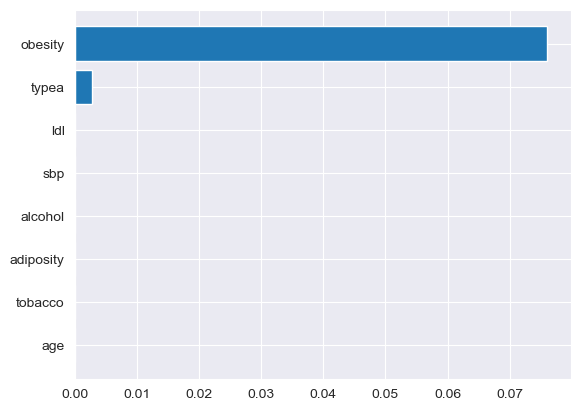

In [94]:
#OJO: para hacer seleccion k-beast es importante que las variables posibles, X, no sean negativas (estamos hablando todo de continuas)
#por lo tanto, mejor normalizar (max,min) que estandarizar (mu,sigma)
#k indica la cantidad de atributos que serán seleccionados como los mejores para el modelo

selector = SelectKBest(score_func=chi2, k=3)
selector.fit(X,y)

df_chi2 = pd.DataFrame(zip(selector.pvalues_, X.columns), columns=["pvalor", "feature"]).sort_values("pvalor")

plt.barh(y=df_chi2["feature"], width=df_chi2["pvalor"])
plt.show()

# Explicar en la documentacion ExtraTreesClassifier:
Algoritmo de clasificación basado en árboles de decisión de la biblioteca scikit-learn. Construye árboles extremadamente aleatorios, al igual Random Forest, ExtraTrees utiliza ensamblaje de árboles, pero con una diferencia clave en su proceso de entrenamiento.

Ensamblaje de árboles: construye múltiples árboles de decisión para formar un clasificador más robusto y preciso.

Bootstrapping: para cada árbol en el ensamblaje, aplica bootstrapping para generar muestras aleatorias con reemplazo a partir del conjunto de entrenamiento original. Esto implica que cada árbol verá un subconjunto diferente de los datos.

Aleatoriedad en la construcción del árbol: nn lugar de buscar el mejor punto de división en cada nodo como en los árboles de decisión tradicionales, ExtraTreesClassifier selecciona puntos de división al azar. Esto introduce más aleatoriedad y evita la elección de características óptimas en cada nodo.

Votación para la predicción: cuando todos los árboles están construidos, las predicciones finales del ExtraTreesClassifier se obtienen mediante votación. Cada árbol vota por la clase más probable y la clase con más votos, teniendo en cuenta todos los árboles obtenidos, se convierte en la predicción final.

El ExtraTreesClassifier es útil para tareas de clasificación, especialmente cuando se trabaja con conjuntos de datos de alta dimensionalidad o con características redundantes. La aleatoriedad en la construcción de los árboles ayuda a reducir el sobreajuste y mejorar la generalización del modelo.

In [ ]:
#ojo que aquí se aplica directamente sin hacer división en train/test, porque no nos interesa tanto obtener un modelo
#predictivo como tener una idea sobre las variables mas interesantes
#como sólo hay una categórica, se analizan únicamente ahora las continuas
model = ExtraTreesClassifier() #se selecciona el tipo de modelo que se aplicará
model.fit(X, y) #se ajusta el modelo escogido usando como input las variables en X y como output/target, y
model.feature_importances_ #se calcula, para este modelo, cómo de importante han sido las variables

pd.DataFrame(zip(model.feature_importances_, X.columns), 
             columns=['importance', 'feature']).\
             sort_values('importance', ascending=False)

#para definir el gráfico de barras, se define qué hay en cada eje y qué se representa
plt.barh(y=X.columns, width=model.feature_importances_) 
#para mostrar el gráfico de barras
plt.show()

# Qué es StratifiedKFold
 Es una técnica de validación cruzada que se utiliza para evaluar el rendimiento de un modelo de clasificación. Es una variante de la validación cruzada k-fold que garantiza que las proporciones de clases se mantengan en cada partición del conjunto de datos.
Validación cruzada k-fold: divide el conjunto de datos en k pliegues (folds) o particiones del mismo tamaño. Luego, entrena el modelo k veces, utilizando cada uno de los pliegues como conjunto de prueba y los restantes como conjunto de entrenamiento (donde dice pliegue habitualmente se habla de grupos)

StratifiedKFold: En la validación cruzada k-fold tradicional, las particiones se generan de manera aleatoria, lo que podría resultar en distribuciones desiguales de clases en los pliegues. StratifiedKFold, en cambio, asegura que las proporciones de clases se mantengan en cada partición.

La ventaja de usar StratifiedKFold es que proporciona una evaluación más confiable del rendimiento del modelo, especialmente cuando se trata de conjuntos de datos desequilibrados, donde una clase tiene muchas más muestras que otras.

## Parámetros StratifiedKFold

n_splits: número de grupos (folds) en los que se divide el conjunto de datos. Especifica la cantidad de iteraciones de entrenamiento y prueba que se realizarán durante la validación cruzada. Por defecto, n_splits=5.

shuffle: valor booleano que indica si los datos deben ser mezclados antes de dividirlos en grupos. Si se establece en True, los datos se reordenarán aleatoriamente antes de realizar la validación cruzada. Por defecto, shuffle = False.

random_state: controla la semilla utilizada para la generación de números aleatorios cuando shuffle=True. Proporcionar un valor específico para random_state garantiza que los resultados sean reproducibles.

stratify: arreglo o serie de etiquetas (clases) que indica la distribución de las clases en el conjunto de datos. StratifiedKFold asegurará que las proporciones de clases se mantengan en cada partición. Si no se proporciona, stratify se establecerá automáticamente en y (etiquetas de destino) por defecto.

indices: este parámetro no es parte de la clase StratifiedKFold en sí, pero es utilizado para acceder a los índices de entrenamiento y prueba de cada fold durante la validación cruzada. Puedes utilizar este parámetro en un bucle for para obtener los índices de entrenamiento y prueba en cada iteración.

## RFECV (Recursive Feature Elimination with Cross-Validation) 

Técnica de selección de características de scikit-learn. Es una variante del algoritmo de eliminación recursiva de características (Recursive Feature Elimination, RFE) que incorpora validación cruzada (Cross-Validation) para mejorar la selección de características y evitar el sobreajuste.

La selección de características puede ayudar a reducir la dimensionalidad del conjunto de datos y mejorar la precisión del modelo al eliminar características irrelevantes o redundantes.

1. Eliminación recursiva de características: empieza con todas las características en el modelo y realiza la CV con un estimador específico. Luego, identifica y elimina la característica menos importante según algún criterio (por defecto, utiliza el coeficiente más bajo de importancia de las características).

2. Validación cruzada (CV): después de eliminar la característica menos importante, el modelo se vuelve a entrenar y se evalúa utilizando validación cruzada. Este paso ayuda a estimar el rendimiento del modelo con la característica eliminada.

3. Repeticiones: Repite los pasos 1 y 2 hasta que se alcance un número específico de características seleccionadas o hasta que el rendimiento del modelo no mejore significativamente.

El uso de validación cruzada en RFECV permite una evaluación más precisa del rendimiento del modelo durante la selección de características, ya que evita el sobreajuste y proporciona una estimación más realista del rendimiento del modelo en datos no vistos.

## ¿Con qué criterio se evalúa la bondad del modelo? Scoring
1. Para problemas de clasificación:
- accuracy: precisión, que es la proporción de muestras clasificadas correctamente.
- precision: precisión del clasificador, que es la proporción de verdaderos positivos sobre el total de predicciones positivas (TP / (TP + FP)).
- recall: sensibilidad, que es la proporción de verdaderos positivos sobre el total de muestras positivas (TP / (TP + FN)).
- f1: puntuación F1, que es la media armónica de precisión y recall.
- roc_auc: ñarea bajo la curva ROC, que mide la capacidad de discriminación del clasificador.

2. Para problemas de regresión:
- neg_mean_squared_error: error cuadrático medio negativo, que mide el promedio de los errores al cuadrado entre las predicciones y los valores reales (negativo porque scikit-learn espera que las métricas de puntuación sean maximizadas).
- r2: coeficiente de determinación R^2, que mide la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes.

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


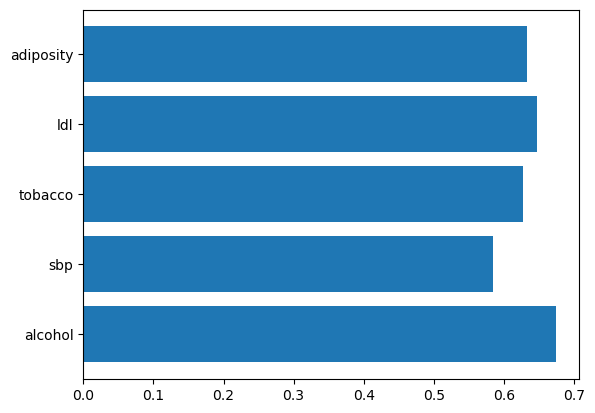

In [37]:
#para que todo el proceso sea reproducible, fijamos la semilla de aleatorización, seed, desde el principio
#se define el tipo de stratifiedKFold que se aplica, en este caso con 10 grupos y remuestreo
#en este ejemplo, como estimador se propone un Random Forest con n_estimator=50 árboles ensamblados
#la idea aquí es simplemente utilizar este clasificador como método para evaluar la importancia de las variables, 
#no tanto tratar de ajustar un buen modelo predictivo
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
estimator = RandomForestClassifier(n_estimators=50, random_state=seed)

#una vez definida la estructura de StratifiedCV y el modelo que se usará como base, se aplica la selección RFECV
#STEP determina la cantidad de características que se eliminarán en cada iteración
#step=0.5: en cada iteración, se eliminará la mitad de las características menos importantes.
#step=2: en cada iteración, se eliminarán dos características menos importantes.
selector = RFECV(estimator, step=1, cv=kfold, scoring="accuracy", n_jobs=-1)
selector = selector.fit(X, y)
selector.n_features_

skf = pd.DataFrame(zip(selector.ranking_, selector.grid_scores_, X.columns), 
                   columns=['importance', 'score', 'feature']).\
                   sort_values('importance', ascending=False).head()
skf["score"] = skf["score"].apply(lambda x: x.mean())
skf

plt.barh(y=skf["feature"], width=skf["score"])
plt.show()

## Una vez aplicados distintos criterios de selección, se escogen las variables candidatas
Por la tabla cruzada entre la única categórica que hay, famhist, y la target, chd, como se rechaza H0, podemos afirmar
que famhist sí tiene relación con chd, por lo que habrá que tenerla en cuenta. Además, servirá para ilustrar la forma
de utilizar variables categóricas, especialmente en redes neuronales

Las variables seleccionadas como input candidatas serán
- famhist (habrá que ver cómo usar sus categorías)
- age, tobacco, obesity, typea, adiposity

# Técnicas de Validación
La mejor forma de evaluar un modelo será hacer predicciones para nuevos datos para los que ya se conocen las respuestas
Aplicaremos técnicas de remuestreo que permitan hacer estimaciones precisas de cómo de bien se ajusta un modelo. En este caso vamos a ver técnicas de división en Train-Test y técnicas de validación cruzada

In [38]:
#División Train-Test, usando train_test_split de sklearn.model_prediction
#Train-Test es la técnica de remuestreo más sencilla y rápida, y es ideal para datasets grande, pero podría no ajustar bie
#datasets muy sesgados
#hay que especificar el tamaño de la partición para evaluar, en este caso hacemos un Tr/Ts (80,20)
#la estructura básica es
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#definimos los grupos de variables input con los que se harán pruebas
#RECORDATORIO: data ahora contiene las variables continuas normalizadas
#armazena las variables selecionadas para cada scenario
select_cols = ['age', 'tobacco', 'obesity', 'typea', 'adiposity', 'famhist']
X_todas = data.drop(target, axis=1) #elimina de data la variable definida como target
X_num = data[continuas] #selecciona únicamente las variables numéricas
X_select = data[select_cols]
y = data[target]

In [37]:

#para tener algo con lo que compararnos, partimos de una regresión logística
#para que el proceso sea reproducible, es importante fijar la semilla de aleatorización, random_state
regression_model = LogisticRegression(random_state=seed)
#forma sencilla de una posible aplicación rápida y sin parámetros de regresión, utilizando todas las variables
X_num_tr, X_num_ts, Y_train, Y_test = train_test_split(X_num, y, test_size=0.2, random_state=seed)

# Entrenar el modelo con los datos de entrenamiento
regression_model.fit(X_num_tr, Y_train)
#una vez entrenado el modelo, evaluamos su bondad

# sabiendo que el conjunto de prueba es X_num_ts, Y_test
Y_pred = regression_model.predict(X_num_ts) #se calcula la predicción que se obtendría al aplicar el modelo

#calculamos medidas de bondad, comparando la parte de test reservada para la variable objetivo y las predicciones obtenidas
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)
#al calcular la precisión, en pos_label hay que especificar la categoría positiva de la variable objetivo, dependiendo de las etiquetas
precision = precision_score(Y_test, Y_pred, pos_label='Si')
recall = recall_score(Y_test, Y_pred, pos_label='Si')
f1 = f1_score(Y_test, Y_pred, pos_label='Si')

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

#para modelos de regresión lineal
#y_pred = model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print(f'MSE: {mse}')
#print(f'R^2: {r2}')

0.6989247311827957


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

In [43]:
#parametrización de la regresión: método de optimización utilizado, iterciones consideradas
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Ajustar (entrenar) el modelo utilizando los datos de entrenamiento
logistic_regression_model.fit(X_num_tr, Y_train)

# Realizar predicciones en los datos de prueba
y_pred = logistic_regression_model.predict(X_num_ts)

# Solver  (regresión)

- newton-cg: método de Newton conjugado para la optimización. Es adecuado para conjuntos de datos pequeños o medianos.

- lbfgs:  algoritmo BFGS, adecuado para conjuntos de datos pequeños o medianos.

- liblinear:  el algoritmo de descenso de coordenadas. Es más rápido para conjuntos de datos grandes y es el recomendado para conjuntos de datos con una gran cantidad de muestras.

- sag:  método de promedio de gradiente estocástico (Stochastic Average Gradient), adecuado para conjuntos de datos grandes y también es eficiente en términos de memoria.

- saga: variante del algoritmo SAG que también admite penalizaciones L1. Es eficiente para problemas grandes y permite la regularización L1.

Cada algoritmo de optimización tiene sus propias ventajas y desventajas, y la elección del solver dependerá del tamaño del conjunto de datos, la cantidad de muestras, la convergencia, y otros factores. En general, 'liblinear' es una buena opción para conjuntos de datos grandes, mientras que 'newton-cg', 'lbfgs', 'sag', o 'saga' son más adecuados para conjuntos de datos pequeños o medianos.

# Estructura para el entrenamiento de redes neuronales 
1. Preparar los datos: cargar y preprocesar los datos de entrenamiento y prueba. Esto incluye dividir los datos en características (X) y etiquetas/clases (y), así como normalizar o estandarizar las características para facilitar el entrenamiento, solucionar problemas de datos faltantes y convertir a dummies las variables categóricas.

2. Diseñar la arquitectura de la red neuronal: definir la arquitectura de la red neuronal, incluyendo el número de capas ocultas, el número de neuronas en cada capa, la función de activación, entre otros.

3. Crear el modelo: Crear el modelo de red neuronal utilizando alguna biblioteca de deep learning en Python, como TensorFlow o Keras.

4. Compilar el modelo: Compilar el modelo definiendo la función de pérdida, el algoritmo de optimización y las métricas de evaluación.

5. Entrenar el modelo: Ajustar el modelo utilizando los datos de entrenamiento mediante el método fit().

6. Evaluar el rendimiento: Evaluar el rendimiento del modelo utilizando los datos de prueba y diferentes métricas de evaluación.

## Tuneo de redes

- Parámetro losss
1. Problemas de clasificación binaria (dos clases): binary_crossentropy es la función de pérdida más común para problemas de clasificación binaria. Se utiliza cuando solo hay dos clases en el problema y la salida del modelo es un valor entre 0 y 1 (por ejemplo, en una capa de salida con activación sigmoide).

2. Problemas de clasificación multiclase (más de dos clases): 
    a. categorical_crossentropy se utiliza cuando hay más de dos clases en el problema y la salida del modelo es un vector de probabilidades para cada clase. Suele estar asociada con la activación 'softmax' en la capa de salida.
    b. sparse_categorical_crossentropy similar a 'categorical_crossentropy', pero se utiliza cuando las etiquetas son enteros en lugar de codificación one-hot (es decir, etiquetas enteras en lugar de vectores de probabilidades).
    
3. Problemas de regresión: mean_squared_error es la función de pérdida más común para problemas de regresión. Se utiliza cuando el objetivo es predecir un valor numérico y la salida del modelo es una sola neurona sin función de activación.

- Parámetro Dense indica que es una red completamente conectada, es decir, que en cada capa, todos los nodos están conectados con todos los nodos (y ninguno más) de las capas anterior y siguiente el número que se indica a continuación especifica cuántas neuronas hay en esa capa, en el caso de la capa input, debe coincidir con el número de variables que se quieren usar, en este caso, continuas tiene 8 variables es posible modificar la función de activación, usando una en cada capa o la misma siempre hay que especificar cuántos nodos tiene cada capa

- Parámetro batch_size indica la cantidad de muestras de entrenamiento que se utilizarán para calcular el gradiente y actualizar los pesos del modelo en una sola iteración del algoritmo de optimización. .Cuando entrenamos un modelo de aprendizaje automático, generalmente utilizamos un conjunto de datos de entrenamiento que contiene muchas muestras. En lugar de procesar todas las muestras a la vez, el entrenamiento se realiza de forma iterativa en mini lotes o "batches". El tamaño de estos lotes está determinado por el parámetro batch_size esta idea permite paralelizar el proceso, mejora la convergencia y el uso de memoria batch_size suele ser un número entre 32 y 256

- Parámetro epoch: un epoch se completa cuando el modelo ha visto y procesado todos los lotes del conjunto de entrenamiento una vez. Importante: equilibrio al elegir el número de epoch. Un número insuficiente puede resultar en un modelo subentrenado que no ha capturado completamente los patrones en los datos; un número excesivo puede provocar sobreentrenamiento, donde el modelo memoriza los datos de entrenamiento y no generaliza bien a nuevos datos. La cantidad de epochs se ajusta a través de la validación cruzada y el seguimiento del rendimiento del modelo en un conjunto de datos de validación. Cuando el rendimiento del modelo en el conjunto de validación deja de mejorar o comienza a deteriorarse, se considera que el modelo ha convergido y el entrenamiento se detiene.


# Estructura básica de evaluación con validación cruzada explicar en la documentación
## IMPORTANTE: cross_val_score es una función de sklearn, no se puede aplicar directamente a una función de keras, como la definición secuencial del modelo de redes
Se utiliza la función cross_val_score, con parámetros:
- model: modelo que se quiere evaluar
- scoring: medida de bondad
- cv: tipo de CV que se quiere aplicar, por defecto CV con 5 grupos

El resultado de cross_val_score es una lista con la el resultado de la medida de ajuste escogida calculada en cada uno de los grupos. Esto permite hacer la agregación de resultados que sea más conveniente y analizar la estabilidad del modelo.

In [93]:
#Para aplicar CV NO hay que partir de la división en train/test, sino de todos los datos, en este caso, X_num, 
#para utilizar como input todas las variables numéricas e y.
#definimos un modelo de red neuronal
#PROPUESTA: tilizar el adaptador KerasClassifier o KerasRegressor proporcionado por scikit-learn para envolver el 
#modelo de Keras y hacerlo compatible con las funciones de scikit-learn que requieren estimadores

# Define la función que crea el modelo de Keras
def create_model():
    model.add(Dense(8, input_dim=X_num.shape[1], activation='tanh')) #capa input
    model.add(Dense(5, activation='relu')) #capa oculta, la ajustamos con 3 neuronas artificiales
    model.add(Dense(1, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Crea el modelo de KerasClassifier
red = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Utiliza el modelo de KerasClassifier con funciones de scikit-learn
from sklearn.model_selection import cross_val_score

# Por ejemplo, realiza validación cruzada
scoring='accuracy'
scores = cross_val_score(model, X_num, y, cv=5,scoring=scoring)
print(scores)

[nan nan nan nan nan]


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3629, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line

# Tuneo y evaluación de redes neuronales con sklearn
1. Carga y preprocesamiento de datos: Carga los datos de y realiza el preprocesamiento necesario: escalamiento de variables numéricas, codificación de variables categóricas, manejo de valores faltantes, entre otros.

2. División de datos: Divide los datos en conjuntos de entrenamiento y prueba para poder evaluar el rendimiento del modelo en datos no vistos.

3. Definición del modelo: Crea la arquitectura de la red neuronal definiendo el número de capas, el número de unidades en cada capa, las funciones de activación, etc.

4. Tuneo de hiperparámetros: Utiliza técnicas como la búsqueda de hiperparámetros (por ejemplo, GridSearchCV o RandomizedSearchCV de scikit-learn) para encontrar los mejores valores de hiperparámetros para tu red neuronal.

5. Entrenamiento del modelo: Entrena el modelo con los datos de entrenamiento utilizando el método fit(), ajustando los hiperparámetros obtenidos en el paso anterior.

6. Evaluación del modelo: Evalúa el rendimiento del modelo en el conjunto de prueba utilizando métricas relevantes (por ejemplo, precisión, recall, F1-score, etc.).

En sklearn NO es necesario hacer la compilación del modelo. Para especificar el algoritmo de optimización se puede usar solver 

# Parámetros de MLPClassifier  
Perceptrón Multicapa (MLP) para tareas de clasificación en aprendizaje automático. El Perceptrón Multicapa es un tipo de red neuronal artificial con múltiples capas, que puede aprender relaciones no lineales y complejas en los datos.

El MLPClassifier utiliza el algoritmo de retropropagación (backpropagation) para ajustar los pesos de las conexiones entre las neuronas durante el proceso de entrenamiento. Este algoritmo busca minimizar la función de pérdida para mejorar la precisión de las predicciones del modelo. Algunos de los parámetros más importantes del MLPClassifier son:

- hidden_layer_sizes: tupla que especifica el número de neuronas en cada capa oculta. Por ejemplo, (10, 5) indica que el modelo tiene dos capas ocultas, la primera con 10 neuronas artificales y la segunda con 5 neuronas artificiales. En general, en problemas de clasificación bastará con usar una sola capa oculta.

- activation: función de activación utilizada en las capas ocultas. Las opciones comunes son 'relu' para funciones no lineales y 'logistic' para funciones sigmoidales, o tanh.

- solver: algoritmo de optimización utilizado para ajustar los pesos del modelo. Algunas opciones populares son 'adam', 'sgd' (descenso de gradiente estocástico) y 'lbfgs' (algoritmo de cuasi-Newton).

- alpha: parámetro de regularización L2 para controlar la penalización de los pesos grandes y evitar el sobreajuste.

- learning_rate: esquema de tasa de aprendizaje que determina cómo se ajustan los pesos durante el entrenamiento. Puede ser 'constant', 'invscaling' o 'adaptive'.

- max_iter: El número máximo de itera


In [38]:
data_original = pd.read_csv('./SAheart.csv') 
data = data_original


#busca nulos
data.isna().sum()

# determina variable objetivo
target = "chd"
#hacer una lista con las variables input numericas
continuas = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
#hacer una lista con las variables input categoricias
categoricas = ['famhist']


#busca duplicados
print(data.duplicated().sum()) #para ver si hay alguna obs duplicada
print(data.shape) #tamaño (filasxcolumnas) del archivo
data = data.drop_duplicates() #eliminar duplicados (si procede)


#normaliza variables numericas usando media y desv.tipica
scaler = StandardScaler()
X = data[continuas]
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale.columns = X.columns
data[continuas] = X_scale

#crear dummies
#aquí se define una forma ed transformar, pero no se aplic
cat_trans_cols = ColumnTransformer(transformers=[ ('ohe', OneHotEncoder(drop='first'), categoricas)],
                                    remainder='passthrough')


#definir la variable objetivo
y = data[target]
# 2. División de datos en conjuntos de entrenamiento y prueba,
#usando las variables ya preprocesadas (ojo que no se están usando
#las categóricas)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

# 3. Definición del modelo, para que sea repoducible usar siempre la misma semilla
red = MLPClassifier(random_state=seed)

# 4. Tuneo de hiperparámetros utilizando GridSearchCV
parameters = {'hidden_layer_sizes': [(5,), (10,), (15, ), (20, )],
              'alpha': [0.0001, 0.001, 0.01],
              'activation': ['relu', 'tanh'], 'solver': ['adam'], 'max_iter': [300, 500, 600]}
grid_search = GridSearchCV(red, parameters, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# 5. Entrenamiento del modelo con los mejores hiperparámetros
best_model = MLPClassifier(**best_params, random_state=seed)
best_model.fit(X_train, y_train)

# 6. Evaluación del modelo en el conjunto de prueba
accuracy = best_model.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

0
(462, 10)


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Mejores hiperparámetros encontrados: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'max_iter': 500, 'solver': 'adam'}
Precisión en el conjunto de prueba: 0.6774193548387096


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Análisis de resultados
usando el atributo .best_params sólo obtenemos la parametrización propuesta que mejores resultados arroja
si se quieren ver los resultados de todos los modelos para poder analizarlos se puede utilizar el atributo cv_results_ diccionario que contiene diversas métricas y estadísticas para cada ajuste realizado durante la búsqueda de hiperparámetros

- mean_fit_time: Tiempo promedio de ajuste para cada combinación de hiperparámetros.
- std_fit_time: Desviación estándar del tiempo de ajuste para cada combinación de hiperparámetros.
- mean_score_time: Tiempo promedio de evaluación en el conjunto de prueba para cada combinación de hiperparámetros.
- std_score_time: Desviación estándar del tiempo de evaluación en el conjunto de prueba para cada combinación de hiperparámetros.
- params: Lista de diccionarios que contienen los valores de los hiperparámetros para cada combinación.
- mean_test_score: Promedio de las puntuaciones de rendimiento en el conjunto de prueba para cada combinación de hiperparámetros.
- std_test_score: Desviación estándar de las puntuaciones de rendimiento en el conjunto de prueba para cada combinación de hiperparámetros.
- rank_test_score: El rango del rendimiento en el conjunto de prueba para cada combinación de hiperparámetros (1 es el mejor).

In [83]:
# Ver todos los resultados de los modelos ajustados. Esta forma de verlo no es muy intuitiva
print(grid_search.cv_results_)

#Para mejorar la visualización, convertir cv_results_ en un DataFrame de pandas
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Mostrar los resultados en forma de lista
result_list = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(result_list)

                                               params  mean_test_score  \
0   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.669377   
1   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.666667   
2   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.663957   
3   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.674797   
4   {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.682927   
..                                                ...              ...   
67  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...         0.704607   
68  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...         0.701897   
69  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...         0.707317   
70  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...         0.715447   
71  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...         0.707317   

    std_test_score  rank_test_score  
0         0.026828               64  
1         0.033191               67

# Evaluación del modelo con CV usando sklearn
Una vez escogida la mejor parametrización, el modelo se vuelve a entrenar para evaluar su ajuste aplicando validación cruzada
Mejores hiperparámetros encontrados: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'max_iter': 500, 'solver': 'adam'}

In [80]:
# Crear un modelo MLPClassifier con los hiperparámetros seleccionados
model = MLPClassifier(hidden_layer_sizes=(15,), activation='tanh', solver='adam', random_state=seed)

# Realizar validación cruzada con 5 grupos y obtener la precisión promedio
scores = cross_val_score(model, X_scale, y, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

print("Precisión promedio con validación cruzada:", mean_accuracy)
print("Precisión en cada grupo de validación cruzada:", scores)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión promedio con validación cruzada: 0.7099345488546049
Precisión en cada grupo de validación cruzada: [0.75 0.68 0.63 0.73 0.76]


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Evaluación del modelo con repeated CV usando sklearn
Una vez escogida la mejor parametrización, el modelo se vuelve a entrenar para evaluar su ajuste aplicando validación cruzada Mejores hiperparámetros encontrados: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'max_iter': 500, 'solver': 'adam'}

In [86]:
#la parametrización también se le puede dar a la función MLPClassifier
model = MLPClassifier(random_state=seed)
param_grid = {'hidden_layer_sizes': [(15,)],
              'alpha': [0.001],
              'activation': ['tanh'], 'solver': ['adam'],
              'max_iter': [600]}
# Realizar validación cruzada repetida (10 repeticiones, 5 folds)
repcv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=seed)

# Realizar la búsqueda de hiperparámetros con validación cruzada repetida
grid_search = GridSearchCV(model, param_grid, cv=repcv)
grid_search.fit(X_scale, y)

# Obtener los resultados y métricas
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_test_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
rank_test_scores = grid_search.cv_results_['rank_test_score']

# Mostrar los resultados en forma de lista
for mean_score, std_score, param, rank_score in zip(mean_test_scores, std_test_scores, params, rank_test_scores):
    print(f"Mean test score: {mean_score:.4f}, Std test score: {std_score:.4f}, Rank test score: {rank_score}, Parameters: {param}")


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Mean test score: 0.6916, Std test score: 0.0310, Rank test score: 2, Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.6916, Std test score: 0.0310, Rank test score: 2, Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.6918, Std test score: 0.0316, Rank test score: 1, Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (15,), 'max_iter': 600, 'solver': 'adam'}


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


si en vez de aplicar repeatCV a una parametrización concreta se quiere hacer el tuneo sobre este tipo de remuestreo, basta con implementar todas las parametrizaciones en param_grid





In [100]:
red2 = MLPClassifier(random_state=seed)
param_grid = {'hidden_layer_sizes': [(15,), (20,), (25,)],
              'alpha': [0.001, 0.01, 0.1],
              'activation': ['tanh', 'softmax'], 'solver': ['adam'],
              'max_iter': [600]}
# Realizar validación cruzada repetida (10 repeticiones, 5 folds)
repcv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=seed)

# Realizar la búsqueda de hiperparámetros con validación cruzada repetida
#seleccionamos las variables input de la red del conjunto transformado
explicativas = transformed_df[['tobacco', 'age', 'famhist_Absent']]
grid_search = GridSearchCV(red2, param_grid, cv=repcv)
grid_search.fit(explicativas, y)

# Obtener los resultados y métricas
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_test_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
rank_test_scores = grid_search.cv_results_['rank_test_score']

# Mostrar los resultados en forma de lista
for mean_score, std_score, param, rank_score in zip(mean_test_scores, std_test_scores, params, rank_test_scores):
    print(f"Mean test score: {mean_score:.4f}, Std test score: {std_score:.4f}, Rank test score: {rank_score}, Parameters: {param}")

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 427, in _fit
    self._fit_stochastic(


Mean test score: 0.7165, Std test score: 0.0439, Rank test score: 8, Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.7187, Std test score: 0.0421, Rank test score: 5, Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.7208, Std test score: 0.0441, Rank test score: 1, Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (25,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.7165, Std test score: 0.0439, Rank test score: 8, Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (15,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.7187, Std test score: 0.0421, Rank test score: 5, Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'max_iter': 600, 'solver': 'adam'}
Mean test score: 0.7198, Std test score: 0.0430, Rank test score: 2, Parameters: {

Entender y adaptar la función test_3_variable_selection